### Problem Statement 3: General Deep Network

Network: 1 input layer, 3 hidden layers/5 hidden layers and 1 output layer

3.1
1D Data:
y=sin(x) is the function used to generate the dataset.
Network: 1 neuron in each; input layer, all hidden layers and output layer
Activation Function Used: ReLU
Loss function: Regression Loss

3.2
Multidimensional Data:
Considered: p features of x; x1 and x2, ...., xp
Using seed(), function used is:
y=0.4*x1 + 0.4*x2 + ... + 0.4*xi + 1 is the function used to generate the dataset.
Network: p neurons in input layer, 2 neurons in hidden layer and 1 neuron in output layer
Activation Function Used: ReLU
Loss function: Regression Loss

Number of input neurons => number of features in input layer
Training data arrays;
training_inputs - array of taining dataset [[(x11, x12, x13, ... , x1p), y1], [(x21, x22, x23, ... , x2p), y2], ...]
testing_inputs - array of testing dataset [[(x11, x12, x13, ... , x1p), y1], [(x21, x22, x23, ... , x2p), y2], ...]

In [1]:
import numpy as np
import pandas as pd
import random
from random import random
from random import seed
from math import exp
import math
import matplotlib.pyplot as plt
from past.builtins import xrange
from pylab import *
global p
global accuracy
global lasterr

In [2]:
#Forming 1D training data - number of samples generated = 20
#Linear function used - y=sin(x)
samples=100
losserr=[]
error=0
def make1ddatatrain(samples):
    training_inputs=[]
    for i in range(samples):
        x = np.random.rand(samples,1)
        Y = np.empty((samples,1))
        Y = np.sin(x)
        xy=[x[i],Y[i]]
        training_inputs.append(xy)
    print(training_inputs)
    #Plotting the 1d train data
    plt.plot(x, Y, 'bo')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('1D train data - Sine Wave')
    plt.show()
    return training_inputs

In [3]:
#Forming 1D testing data - number of samples generated = 20
def make1ddatatest(samples):
    test_inputs=[]
    for i in range(samples):
        x = np.random.rand(samples,1)
        Y = np.empty((samples,1))
        Y = np.sin(x)
        xy=[x[i],Y[i]]
        test_inputs.append(xy)
    print(test_inputs)
    #Plotting the 1d train data
    plt.plot(x, Y, 'bo')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('1D train data - Sine Wave')
    plt.show()
    return test_inputs

Enter number of input neurons wanted if multidimensional data is choosen.

In [26]:
#Forming multidimensional training data - number of samples generated = 20
p=int(input("Enter number of input neurons."))
bet=[]
for i in range(p):
    seed(2)
    n=float("{0:.1f}".format(np.random.uniform(0, 1)))
    bet=np.append(bet,n) #multidimensional function used -> y=0.4*x1 + 0.4*x2+1
def makedatatrain(no_in_neurons, samples):
    training_inputs=[]
    for i in range(samples):
        x=np.random.uniform(0, 1, (samples,no_in_neurons))
        Y=np.empty([samples,1])
        Y=np.dot(x,bet.transpose())
        Y=Y+1
        xy=[x[i],Y[i]]
        training_inputs.append(xy)
    return training_inputs

Enter number of input neurons.2


In [5]:
#Forming multidimensional testing data - number of samples generated = 20
bet=[]
for i in range(p):
    seed(2)
    n=float("{0:.1f}".format(np.random.uniform(0, 1)))
    bet=np.append(bet,n) #multidimensional function used -> y=0.4*x1 + 0.4*x2+1
def makedatatest(no_in_neurons, samples):
    test_inputs=[]
    x=np.random.uniform(0, 1, (samples,no_in_neurons))
    Y=np.empty([samples,1])
    Y=np.dot(x,bet.transpose())
    Y=Y+1
    xy=[x[i],Y[i]]
    test_inputs.append(xy)
    return test_inputs

In [6]:
class Network(object):

    def __init__(self, sizes):
        self.num_layers = len(sizes)
        self.sizes = sizes
        #Randomly generate weights and biases arrays.
        #let i=input neuron, h=hidden neuron, o=output neuron, l=layer number(1-input, h1-first hidden layer ... hl-last hidden layer, l+1-output layer), wlij=weights from jth neuron in layer l to ith neuron in layer l-1 
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])]
        
    def feedforward(self, a):
        for b, w in zip(self.biases, self.weights):
            a = ReLU(np.dot(w, a)+b)
        return a

    def callbackprop(self, training_data, epochs, batch_size, eta, test_data=None):
        losserr=[]
        n_test = len(test_data)
        n = len(training_data)
        for j in xrange(epochs):
            alldata = [training_data]
            for i in alldata:
                #nabla_b and nabla_w are new empty matrices of same dimensions as biases and weights matrices
                nabla_b = [np.zeros(b.shape) for b in self.biases]
                nabla_w = [np.zeros(w.shape) for w in self.weights]
                #taking each training sample and backpropagating to get dC/db and dC/dw in delta_nabla_b and delta_nabla_w respectively.
                for x, y in i:
                    delta_nabla_b, delta_nabla_w = self.backprop(x, y)
                    #add each of the change of biases and weights to the changed biases(nabla_b) and weights(nabla_w) matrices to get final changed biases and weights matrices respectively
                    nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
                    nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
                    #updating network with the new weights and biases recieved from each training sample
                self.weights = [w-(eta)*nw for w, nw in zip(self.weights, nabla_w)]
                self.biases = [b-(eta)*nb for b, nb in zip(self.biases, nabla_b)]
        
            print("Epoch {0}: {1} / {2}".format(j, self.evaluate(test_data), n_test))
        
        
    def backprop(self, x, y):
        #Returns a tuple (nabla_b, nabla_w) = gradient of cost function, C
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        
        #feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            lastz=z
            zs.append(z)
            activation = z
            activations.append(activation)
            
        #last z of output layer is no activation, only z; 
        activations[-1]=lastz
        #backward pass
        delta = self.cost_derivative(activations[-1], y) * der_relu(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = der_relu(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            if(l==self.num_layers-1):
                arr=activations[1]
                arr.reshape((1,1))
                activations[-l-1]=arr
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)
        
    #Evaluates the loss for test_data=[test_datax, test_datay]; loss=1/2*((test_datay-lossoftestdatax)^2)
    def evaluate(self, test_data):
        error=0
        test_results = [(self.feedforward(x), y) for (x, y) in test_data]
        for i in range(len(test_data)):
            error=error+(((test_results[i][1]-test_results[i][0])**2)/2)
            lasterr=error
        lasterr=lasterr[0][0]
        losserr.append(lasterr)
        print("losserr",losserr)
        plt.plot(losserr)
        return error
    
    #Plotting the graph
    def plot(self,test_data):
        losserr=[]
        err=self.evaluate(test_data)
        print("err",err[0][0])
        losserr.append(err[0][0])
        print("losserr",losserr)
        plt.plot(losserr)

    def cost_derivative(self, output_activations, y):
        #Returns dC/da
        return (output_activations-y)

#ReLU function
def ReLU(z):
    return np.maximum(0,z)

#derivative of ReLU fuction
def der_relu(z):
    z=np.maximum(0,z)
    if(z>0):
        return np.ones((1,1))
    else:
        return np.zeros((1,1))

Underneath is the main function which is used to choose between 1D data and multidimensional data.
Choose 1 for 1D data and 2 for multidimensional data.
Choose 3 or 5 for 3 hidden layers and 5 hidden layers respectively.

Also, as run earlier, above chosen value for number of input neurons is used as p.

In [27]:
#Main function to call after compiling all of the above

##Give following input => option = 1, nh = 3 
option = int(input("Enter 1 for 1D data or 2 for multidimensional data"))
nh=int(input("Enter 3 or 5 for number of hidden layers."))
h3n=[1,1,1]
h5n=[1,1,1,1,1]
if option == 1:
    if nh==3:
        losserr=[]
        epochs=50
        eta=0.0006
        error=0
        training_data1 = make1ddatatrain(samples) # Make 1D train dataset having 1 input neurons
        testing_data1 = make1ddatatest(samples) # Make 1D test dataset having 1 input neurons
        print("Number of neurons in 1st layer=1 and in 2nd layer=1")
        net=Network([1,1,1,1,1])  #1 input layer having 1 neuron, 3 hidden layers having 1 neurons, 1 output layer having 1 neuron
    if nh==5:
        losserr=[]
        epochs=10
        eta=90
        error=0
        training_data1 = make1ddatatrain(samples) # Make 1D train dataset having p input neurons
        testing_data1 = make1ddatatest(samples) # Make 1D test dataset having p input neurons
        print("Number of neurons in 1st layer=1 and in 2nd layer=1")
        net=Network([1,1,1,1,1,1,1])  #1 input layer having 1 neuron, 5 hidden layers having 1 neurons, 1 output layer having 1 neuron
##right now forget    
else:
    if nh == 3:
        #[2,1,1,1,1]
        samples=30
        losserr=[]
        error=0
        epochs=200
        eta=0.03
        training_data2 = makedatatrain(p, samples) # Make multidimensional train dataset having p input neurons
        testing_data2 = makedatatest(p, samples) # Make multidimensional test dataset having p input neurons
        ph = int(input("Enter number of hidden layer neurons"))
        print("Number of neurons in 1st layer=p and in 2nd layer=1")
        net=Network([p,1,1,1,1])  #1 input layer having p neurons, hidden layer having 2 neurons and 1 output layer having 1 neuron
    if nh == 5:
        #[2,1,1,1,1,1,1]
        samples=30
        epochs=200
        eta=0.01
        losserr=[]
        error=0
        ph = int(input("Enter number of hidden layer neurons"))
        print("Number of neurons in 1st layer=p and in 2nd layer=1")
        net=Network([p,1,1,1,1,1,1])  #1 input layer having p neurons, hidden layer having 2 neurons and 1 output layer having 1 neuron


Enter 1 for 1D data or 2 for multidimensional data2
Enter 3 or 5 for number of hidden layers.3
Enter number of hidden layer neurons1
Number of neurons in 1st layer=p and in 2nd layer=1


losserr [97.6020729628393]
Epoch 0: [[97.60207296]] / 100
losserr [97.6020729628393, 84.82001965491503]
Epoch 1: [[84.82001965]] / 100
losserr [97.6020729628393, 84.82001965491503, 73.78974988419604]
Epoch 2: [[73.78974988]] / 100
losserr [97.6020729628393, 84.82001965491503, 73.78974988419604, 64.26952642598734]
Epoch 3: [[64.26952643]] / 100
losserr [97.6020729628393, 84.82001965491503, 73.78974988419604, 64.26952642598734, 56.05109649092526]
Epoch 4: [[56.05109649]] / 100
losserr [97.6020729628393, 84.82001965491503, 73.78974988419604, 64.26952642598734, 56.05109649092526, 48.955044047400804]
Epoch 5: [[48.95504405]] / 100
losserr [97.6020729628393, 84.82001965491503, 73.78974988419604, 64.26952642598734, 56.05109649092526, 48.955044047400804, 42.82678796784615]
Epoch 6: [[42.82678797]] / 100
losserr [97.6020729628393, 84.82001965491503, 73.78974988419604, 64.26952642598734, 56.05109649092526, 48.955044047400804, 42.82678796784615, 37.53313620340621]
Epoch 7: [[37.5331362]] / 100
lo

losserr [97.6020729628393, 84.82001965491503, 73.78974988419604, 64.26952642598734, 56.05109649092526, 48.955044047400804, 42.82678796784615, 37.53313620340621, 32.959318680764184, 29.00643236675977, 25.58924120264172, 22.63428157840857, 20.078230877848057, 17.866502530789464, 15.9520360934921, 14.294255255286814, 12.858170437953195, 11.61360589854602, 10.53453403939578, 9.598502033566904, 8.786137944201027, 8.080725298419386, 7.467836610855513, 6.935017672912522, 6.471515561167836, 6.068044297533259, 5.71658293681541, 5.41020158314776, 5.142911461682108, 4.909535709969357, 4.705598016708047, 4.527226634396765, 4.371071635846503, 4.234233580201574]
Epoch 33: [[4.23423358]] / 100
losserr [97.6020729628393, 84.82001965491503, 73.78974988419604, 64.26952642598734, 56.05109649092526, 48.955044047400804, 42.82678796784615, 37.53313620340621, 32.959318680764184, 29.00643236675977, 25.58924120264172, 22.63428157840857, 20.078230877848057, 17.866502530789464, 15.9520360934921, 14.2942552552868

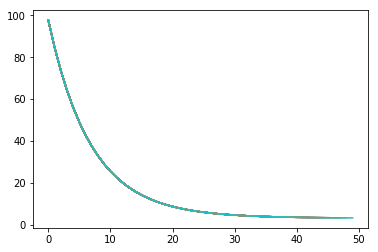

In [23]:
# calling backpropagation for 1D dataset
net.callbackprop(training_data1, epochs, samples, eta, test_data=training_data1)

losserr [97.6020729628393, 84.82001965491503, 73.78974988419604, 64.26952642598734, 56.05109649092526, 48.955044047400804, 42.82678796784615, 37.53313620340621, 32.959318680764184, 29.00643236675977, 25.58924120264172, 22.63428157840857, 20.078230877848057, 17.866502530789464, 15.9520360934921, 14.294255255286814, 12.858170437953195, 11.61360589854602, 10.53453403939578, 9.598502033566904, 8.786137944201027, 8.080725298419386, 7.467836610855513, 6.935017672912522, 6.471515561167836, 6.068044297533259, 5.71658293681541, 5.41020158314776, 5.142911461682108, 4.909535709969357, 4.705598016708047, 4.527226634396765, 4.371071635846503, 4.234233580201574, 4.114202008718482, 4.008802409775347, 3.9161504813486854, 3.8346126817346433, 3.7627721992534284, 3.699399592197949, 3.643427454072398, 3.5939285485403176, 3.550096935467453, 3.5112316757266973, 3.476722759515598, 3.4460389520989314, 3.418717293230804, 3.3943540229795803, 3.372596738090767, 3.35313761008002, 3.35313761008002]
err 3.353137610

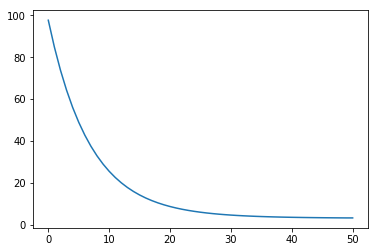

In [24]:
net.plot(training_data1)

losserr [97.6020729628393, 84.82001965491503, 73.78974988419604, 64.26952642598734, 56.05109649092526, 48.955044047400804, 42.82678796784615, 37.53313620340621, 32.959318680764184, 29.00643236675977, 25.58924120264172, 22.63428157840857, 20.078230877848057, 17.866502530789464, 15.9520360934921, 14.294255255286814, 12.858170437953195, 11.61360589854602, 10.53453403939578, 9.598502033566904, 8.786137944201027, 8.080725298419386, 7.467836610855513, 6.935017672912522, 6.471515561167836, 6.068044297533259, 5.71658293681541, 5.41020158314776, 5.142911461682108, 4.909535709969357, 4.705598016708047, 4.527226634396765, 4.371071635846503, 4.234233580201574, 4.114202008718482, 4.008802409775347, 3.9161504813486854, 3.8346126817346433, 3.7627721992534284, 3.699399592197949, 3.643427454072398, 3.5939285485403176, 3.550096935467453, 3.5112316757266973, 3.476722759515598, 3.4460389520989314, 3.418717293230804, 3.3943540229795803, 3.372596738090767, 3.35313761008002, 3.35313761008002, 3.4676984266473

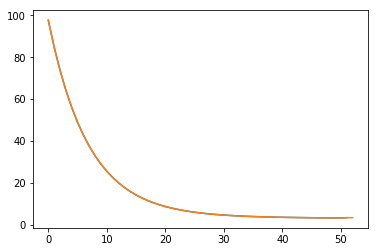

In [25]:
#evaluating for 1D testing dataset
net.evaluate(testing_data1)
net.plot(testing_data1)

losserr [4.546240476913819]
Epoch 0: [[4.54624048]] / 30
losserr [4.546240476913819, 23.419881793263805]
Epoch 1: [[23.41988179]] / 30
losserr [4.546240476913819, 23.419881793263805, 5.073488378658951]
Epoch 2: [[5.07348838]] / 30
losserr [4.546240476913819, 23.419881793263805, 5.073488378658951, 22.131585577632606]
Epoch 3: [[22.13158558]] / 30
losserr [4.546240476913819, 23.419881793263805, 5.073488378658951, 22.131585577632606, 5.574178157857788]
Epoch 4: [[5.57417816]] / 30
losserr [4.546240476913819, 23.419881793263805, 5.073488378658951, 22.131585577632606, 5.574178157857788, 20.989692137831177]
Epoch 5: [[20.98969214]] / 30
losserr [4.546240476913819, 23.419881793263805, 5.073488378658951, 22.131585577632606, 5.574178157857788, 20.989692137831177, 6.0454594166453095]
Epoch 6: [[6.04545942]] / 30
losserr [4.546240476913819, 23.419881793263805, 5.073488378658951, 22.131585577632606, 5.574178157857788, 20.989692137831177, 6.0454594166453095, 19.975125261226854]
Epoch 7: [[19.975125

losserr [4.546240476913819, 23.419881793263805, 5.073488378658951, 22.131585577632606, 5.574178157857788, 20.989692137831177, 6.0454594166453095, 19.975125261226854, 6.485738015160931, 19.07154191874598, 6.894377750130292, 18.2649078603532, 7.271462762789649, 17.54314310893667, 7.61760905643655, 16.895825391229682, 7.93381566351323, 16.31394163886812, 8.221347766166598, 15.789679415558139, 8.481645514597721, 15.316251544018245, 8.716253463108858, 14.887748373358262, 8.926766502801728, 14.499013088586073, 9.114788951861039, 14.145536255694804, 9.281904101594682, 13.82336644840847, 9.429652035353927, 13.52903434088698, 9.55951395977614, 13.259488094821608, 9.672901631195986, 13.012038236067967, 9.7711507390545, 12.78431051896519, 9.855517334553934]
Epoch 38: [[9.85551733]] / 30
losserr [4.546240476913819, 23.419881793263805, 5.073488378658951, 22.131585577632606, 5.574178157857788, 20.989692137831177, 6.0454594166453095, 19.975125261226854, 6.485738015160931, 19.07154191874598, 6.8943777

Epoch 79: [[10.26063331]] / 30
losserr [4.546240476913819, 23.419881793263805, 5.073488378658951, 22.131585577632606, 5.574178157857788, 20.989692137831177, 6.0454594166453095, 19.975125261226854, 6.485738015160931, 19.07154191874598, 6.894377750130292, 18.2649078603532, 7.271462762789649, 17.54314310893667, 7.61760905643655, 16.895825391229682, 7.93381566351323, 16.31394163886812, 8.221347766166598, 15.789679415558139, 8.481645514597721, 15.316251544018245, 8.716253463108858, 14.887748373358262, 8.926766502801728, 14.499013088586073, 9.114788951861039, 14.145536255694804, 9.281904101594682, 13.82336644840847, 9.429652035353927, 13.52903434088698, 9.55951395977614, 13.259488094821608, 9.672901631195986, 13.012038236067967, 9.7711507390545, 12.78431051896519, 9.855517334553934, 12.5742055270306, 9.927176576355622, 12.379863966048545, 9.987223213724763, 12.199636777289458, 10.036673347667481, 12.032059340951198, 10.076467107576043, 11.875829158047477, 10.10747195902021, 11.72978649710554

losserr [4.546240476913819, 23.419881793263805, 5.073488378658951, 22.131585577632606, 5.574178157857788, 20.989692137831177, 6.0454594166453095, 19.975125261226854, 6.485738015160931, 19.07154191874598, 6.894377750130292, 18.2649078603532, 7.271462762789649, 17.54314310893667, 7.61760905643655, 16.895825391229682, 7.93381566351323, 16.31394163886812, 8.221347766166598, 15.789679415558139, 8.481645514597721, 15.316251544018245, 8.716253463108858, 14.887748373358262, 8.926766502801728, 14.499013088586073, 9.114788951861039, 14.145536255694804, 9.281904101594682, 13.82336644840847, 9.429652035353927, 13.52903434088698, 9.55951395977614, 13.259488094821608, 9.672901631195986, 13.012038236067967, 9.7711507390545, 12.78431051896519, 9.855517334553934, 12.5742055270306, 9.927176576355622, 12.379863966048545, 9.987223213724763, 12.199636777289458, 10.036673347667481, 12.032059340951198, 10.076467107576043, 11.875829158047477, 10.10747195902021, 11.729786497105543, 10.130486421126394, 11.59289

Epoch 153: [[8.20969954]] / 30
losserr [4.546240476913819, 23.419881793263805, 5.073488378658951, 22.131585577632606, 5.574178157857788, 20.989692137831177, 6.0454594166453095, 19.975125261226854, 6.485738015160931, 19.07154191874598, 6.894377750130292, 18.2649078603532, 7.271462762789649, 17.54314310893667, 7.61760905643655, 16.895825391229682, 7.93381566351323, 16.31394163886812, 8.221347766166598, 15.789679415558139, 8.481645514597721, 15.316251544018245, 8.716253463108858, 14.887748373358262, 8.926766502801728, 14.499013088586073, 9.114788951861039, 14.145536255694804, 9.281904101594682, 13.82336644840847, 9.429652035353927, 13.52903434088698, 9.55951395977614, 13.259488094821608, 9.672901631195986, 13.012038236067967, 9.7711507390545, 12.78431051896519, 9.855517334553934, 12.5742055270306, 9.927176576355622, 12.379863966048545, 9.987223213724763, 12.199636777289458, 10.036673347667481, 12.032059340951198, 10.076467107576043, 11.875829158047477, 10.10747195902021, 11.72978649710554

losserr [4.546240476913819, 23.419881793263805, 5.073488378658951, 22.131585577632606, 5.574178157857788, 20.989692137831177, 6.0454594166453095, 19.975125261226854, 6.485738015160931, 19.07154191874598, 6.894377750130292, 18.2649078603532, 7.271462762789649, 17.54314310893667, 7.61760905643655, 16.895825391229682, 7.93381566351323, 16.31394163886812, 8.221347766166598, 15.789679415558139, 8.481645514597721, 15.316251544018245, 8.716253463108858, 14.887748373358262, 8.926766502801728, 14.499013088586073, 9.114788951861039, 14.145536255694804, 9.281904101594682, 13.82336644840847, 9.429652035353927, 13.52903434088698, 9.55951395977614, 13.259488094821608, 9.672901631195986, 13.012038236067967, 9.7711507390545, 12.78431051896519, 9.855517334553934, 12.5742055270306, 9.927176576355622, 12.379863966048545, 9.987223213724763, 12.199636777289458, 10.036673347667481, 12.032059340951198, 10.076467107576043, 11.875829158047477, 10.10747195902021, 11.729786497105543, 10.130486421126394, 11.59289

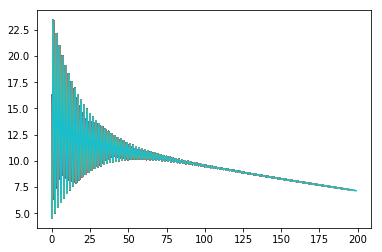

In [28]:
#calling backpropagation for multidimensional dataset
net.callbackprop(training_data2, epochs, samples, eta, test_data=training_data2)

losserr [4.546240476913819, 23.419881793263805, 5.073488378658951, 22.131585577632606, 5.574178157857788, 20.989692137831177, 6.0454594166453095, 19.975125261226854, 6.485738015160931, 19.07154191874598, 6.894377750130292, 18.2649078603532, 7.271462762789649, 17.54314310893667, 7.61760905643655, 16.895825391229682, 7.93381566351323, 16.31394163886812, 8.221347766166598, 15.789679415558139, 8.481645514597721, 15.316251544018245, 8.716253463108858, 14.887748373358262, 8.926766502801728, 14.499013088586073, 9.114788951861039, 14.145536255694804, 9.281904101594682, 13.82336644840847, 9.429652035353927, 13.52903434088698, 9.55951395977614, 13.259488094821608, 9.672901631195986, 13.012038236067967, 9.7711507390545, 12.78431051896519, 9.855517334553934, 12.5742055270306, 9.927176576355622, 12.379863966048545, 9.987223213724763, 12.199636777289458, 10.036673347667481, 12.032059340951198, 10.076467107576043, 11.875829158047477, 10.10747195902021, 11.729786497105543, 10.130486421126394, 11.59289

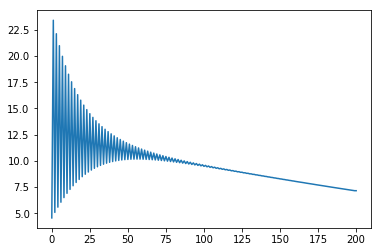

In [29]:
net.plot(training_data2)

losserr [4.546240476913819, 23.419881793263805, 5.073488378658951, 22.131585577632606, 5.574178157857788, 20.989692137831177, 6.0454594166453095, 19.975125261226854, 6.485738015160931, 19.07154191874598, 6.894377750130292, 18.2649078603532, 7.271462762789649, 17.54314310893667, 7.61760905643655, 16.895825391229682, 7.93381566351323, 16.31394163886812, 8.221347766166598, 15.789679415558139, 8.481645514597721, 15.316251544018245, 8.716253463108858, 14.887748373358262, 8.926766502801728, 14.499013088586073, 9.114788951861039, 14.145536255694804, 9.281904101594682, 13.82336644840847, 9.429652035353927, 13.52903434088698, 9.55951395977614, 13.259488094821608, 9.672901631195986, 13.012038236067967, 9.7711507390545, 12.78431051896519, 9.855517334553934, 12.5742055270306, 9.927176576355622, 12.379863966048545, 9.987223213724763, 12.199636777289458, 10.036673347667481, 12.032059340951198, 10.076467107576043, 11.875829158047477, 10.10747195902021, 11.729786497105543, 10.130486421126394, 11.59289

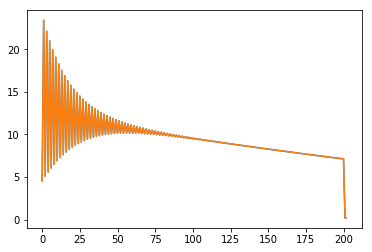

In [30]:
#evaluating for multidimensional testing dataset
net.evaluate(testing_data2)
net.plot(testing_data2)

Plots for all 1D datasets, 3 hidden layers as well as 5 hidden layers

Initial 1D Training Dataset for 3 hidden layers


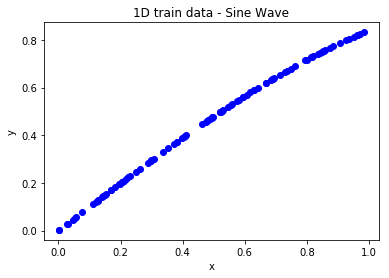

In [31]:
from IPython.display import Image
print("Initial 1D Training Dataset for 3 hidden layers")
Image(filename='3traindataset.png')

Initial 1D Testing Dataset for 3 hidden layers


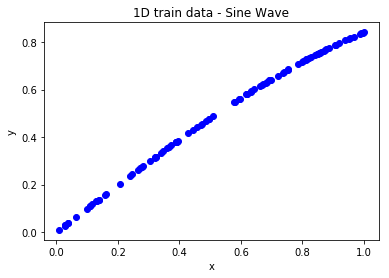

In [32]:
print("Initial 1D Testing Dataset for 3 hidden layers")
Image(filename='test1dinitial.png')

Loss Plot of 1D training data; 3 hidden layers
Loss error:  0.9867192379672262


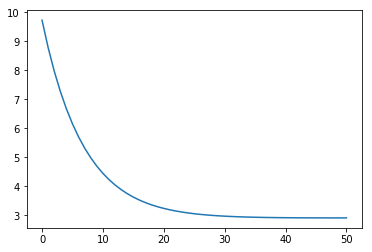

In [33]:
print("Loss Plot of 1D training data; 3 hidden layers")
#Loss error:  0.9867192379672262 recieved on training data for 50 epochs, 0.006 eta and 100 samples.
print("Loss error:  0.9867192379672262")
Image(filename='losstrain1.png')

Loss Plot on 1D testing data; 3 hidden layers
Loss error:  1.0478712353948283


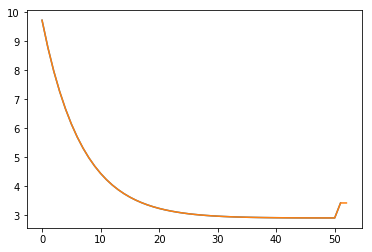

In [34]:
print("Loss Plot on 1D testing data; 3 hidden layers")
#Loss error:  1.0478712353948283 recieved on testing data for 50 epochs, 0.006 eta and 100 samples.
print("Loss error:  1.0478712353948283")
Image(filename='1dtest1.png')

Initial 1D Training Dataset for 5 hidden layers


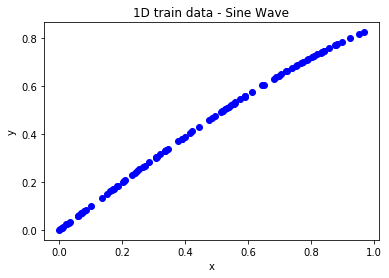

In [35]:
print("Initial 1D Training Dataset for 5 hidden layers")
Image(filename='train51d.png')

Initial 1D Testing Dataset for 5 hidden layers


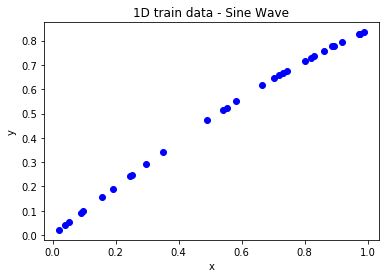

In [36]:
print("Initial 1D Testing Dataset for 5 hidden layers")
Image(filename='test51d.png')

Loss Plot on 1D training data; 5 hidden layers
Loss error:  1.187951791538192


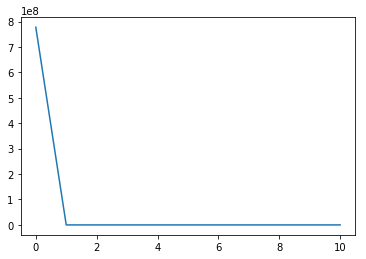

In [37]:
#Loss error:  1.187951791538192 recieved on training data for 100 epochs, 0.03 eta and 30 samples
print("Loss Plot on 1D training data; 5 hidden layers")
print("Loss error:  1.187951791538192")
Image(filename='train5d.png')

Loss Plot on 1D testing data; 5 hidden layers
Loss error:  1.3512505692859804


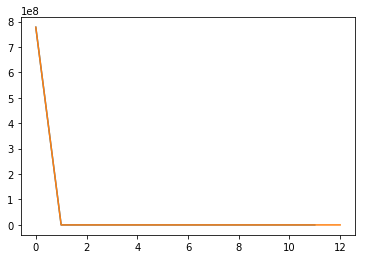

In [38]:
#Loss error:  1.3512505692859804 recieved on testing data for 100 epochs, 0.03 eta and 30 samples
print("Loss Plot on 1D testing data; 5 hidden layers")
print("Loss error:  1.3512505692859804")
Image(filename='test5d.png')

Plots for all multidimensional datasets, 3 hidden layers as well as 5 hidden layers

Loss Plot of multidimensional training data; 3 hidden layers
Loss error:  0.8703879046760752


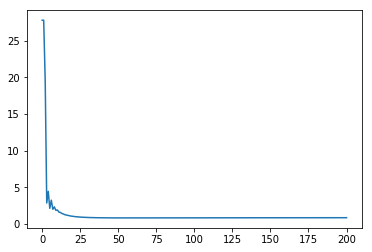

In [39]:
print("Loss Plot of multidimensional training data; 3 hidden layers")
#Loss error:  0.8703879046760752 recieved on training data for 200 epochs, 0.03 eta and 30 samples.
print("Loss error:  0.8703879046760752")
Image(filename='3hmultrain.png')

Loss Plot on multidimensional testing data; 3 hidden layers
Loss error:  0.0010826288427171103


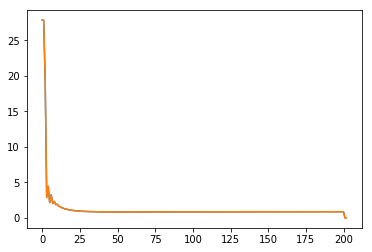

In [40]:
print("Loss Plot on multidimensional testing data; 3 hidden layers")
#Loss error:  0.0010826288427171103 recieved on testing data for 200 epochs, 0.03 eta and 30 samples.
print("Loss error:  0.0010826288427171103")
Image(filename='3hmultest.png')

Loss Plot on multidimensional training data; 5 hidden layers
Loss error: 0.41710466944168345


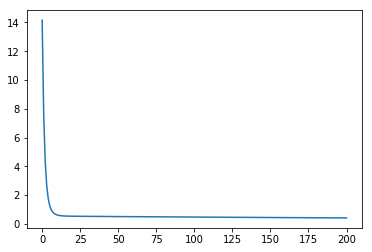

In [41]:
#Loss error:  0.41710466944168345 recieved on training data for 200 epochs, 0.01 eta and 30 samples
print("Loss Plot on multidimensional training data; 5 hidden layers")
print("Loss error: 0.41710466944168345")
Image(filename='5hidmultrain.png')

Loss Plot on multidimensional testing data; 5 hidden layers
Loss error:  0.002024254734703756


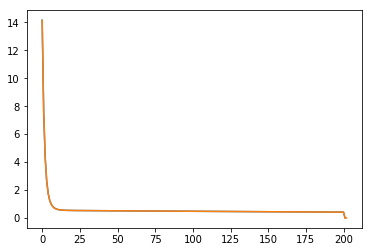

In [42]:
#Loss error:  0.002024254734703756 recieved on testing data for 200 epochs, 0.01 eta and 30 samples
print("Loss Plot on multidimensional testing data; 5 hidden layers")
print("Loss error:  0.002024254734703756")
Image(filename='5hidmultest.png')

By the loss function plot on the training and test data, we can see that the loss is decreasing and hence, the model is trained.

3.1 1D data-
With very less samples, the tyraining wasn't being done.
Number of samples had to be increased and so did the epochs.
Here, with 10 epochs, the loss was only oscillating about the same value, but as the number of epochs increased, the loss even though oscillating, decreased as shown in figure.

A training on samples=100, epochs=50 and eta=0.006 gives a ramp decrease of loss to attain a constant loss of 2.91. Testing over same test data and same hyperparameters gives loss of 3.42.

Same was the case with both 3 hidden layers and 5 hidden layers.

3.2 Multidimensional data-
It is observed that more training, overfits the data and gives bad accuracy for the test data.
So, achieving a fairly low loss on the training data gave a very good accuracy on the test data.
Like, multidimensional data for 3 and 5 hidden layers on training data gave a loss of 0.87 and 0.417 which gave testing loss of 0.001 and 0.002 respectively.
This was observed for alot of samples of datasets.

Observations:
1. Having very low learning rates simply oscillates the loss.

Question 3.b.
Yes, it is harder to choose hyperparameters for deeper networks, as the change of cost with respect to bias and weights changes recursively multiple times.
The challenge that I faced and as seen in my plotted graph is that, oscillatory learning can be seen.
The sharp, spiky learning happens and this makes it difficult to learn.

It is easier to tune hyperparameters for 1D problems as the gradient change with respect to bias and weights has to be analyzed for only few neurons. As the dC/dw and dC/db are fewer, the complexity is smaller and analysis can be performed more efficiently.

Question 3.c.
The depth of the network affects the numebr of epochs needed for it to converge.
As seen above, the networks with 3 hidden layers take more number of epochs to train while networks with 5 hidden neurons take less epochs.
And its considerably less.

If network is trained for more number of epochs, oscillatory and stagnation of loss; that is accuracy is seen.
Plot for 3 hidden layers show that 200 epochs were needed to reach these losses, while 100 epochs were needed for network with 5 hidden layers.

References

1. Micheal Neilsen Neural Networks and Deep Learning (2017). Online Blog. Chapter 1

2. Micheal Neilsen Neural Networks and Deep Learning (2017). Online Blog. Chapter 2


Citations:
1. http://neuralnetworksanddeeplearning.com/chap2.html